# EDA - Play Store Apps

**Importing important libraries**

In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly # visualize 
import plotly.graph_objects as go # advance visualize 
import plotly.express as px # visualize 
plotly.offline.init_notebook_mode(connected=True) # connected = True means it will download the latest version of plotly javascript library.

**Loading data**

In [398]:
df = pd.read_csv("C:\\Users\\TAMANNA\\Downloads\\googleplaystore.csv.zip")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [399]:
#checking shape of data
df.shape

(10841, 13)

In [400]:
#getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [401]:
# getting statistical insights of data
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


**Drop Null Values**

In [402]:
df.dropna(inplace=True)
df.shape

(9360, 13)

**Drop Duplicate Values**

In [403]:
df.drop_duplicates(inplace=True)
df.shape

(8886, 13)

# EDA

## 1. Checking which category have highest rating

In [404]:
c1 = df.groupby('Category',as_index=False)['Rating'].mean()
c1

,Category,Rating
0,ART_AND_DESIGN,4.377049
1,AUTO_AND_VEHICLES,4.190411
2,BEAUTY,4.278571
3,BOOKS_AND_REFERENCE,4.347458
4,BUSINESS,4.102593
5,COMICS,4.155172
6,COMMUNICATION,4.151466
7,DATING,3.971698
8,EDUCATION,4.375969
9,ENTERTAINMENT,4.136036


# 2. Which App cateogry is the highest ?

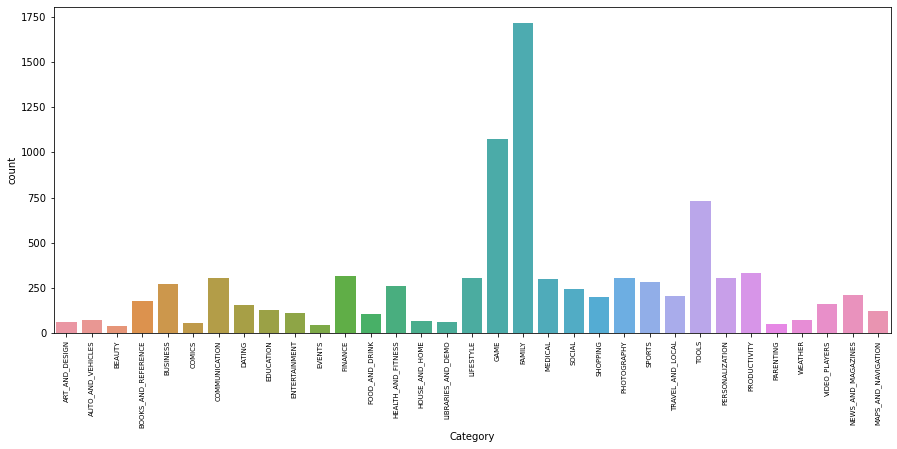

In [405]:
plt.figure(figsize=(15,6))
fig=sns.countplot(x=df["Category"])
fig.set_xticklabels(fig.get_xticklabels(), rotation =90,fontsize=7)
plt.show()
# from this plot we can see that family,tools and game are the top categories

### Defining a function for changing 'Installs' columns in int format

In [406]:
def func(x):
    x = x.replace(',','')
    try:
        x = int(x)
    except:
        try:
            x = int(x.split('+')[0])+int(x.split('+')[1])
        except:
            x = x.replace('+','')
            x = int(x)
    return x

In [407]:
df['Installs'] = df['Installs'].apply(func)
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 8886, dtype: int64

In [408]:
d1 = df.groupby('Category',as_index=False)['Installs'].sum()
d1

,Category,Installs
0,ART_AND_DESIGN,124228100
1,AUTO_AND_VEHICLES,53129800
2,BEAUTY,26916200
3,BOOKS_AND_REFERENCE,1916291655
4,BUSINESS,863518120
5,COMICS,56036100
6,COMMUNICATION,24152241530
7,DATING,206522410
8,EDUCATION,533852000
9,ENTERTAINMENT,2455660000


# 3. Which app have maximum installations

<BarContainer object of 33 artists>

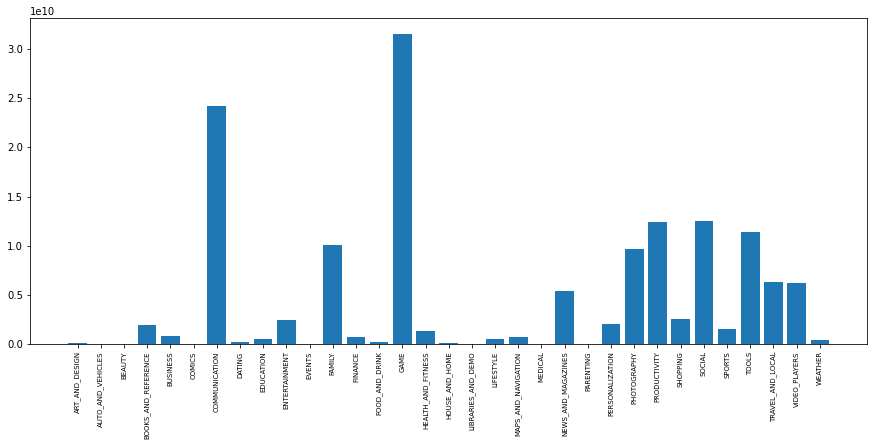

In [409]:
plt.figure(figsize=(15,6))
plt.xticks(rotation =90,fontsize=7)
plt.bar(d1['Category'],d1['Installs'])   

### from this graph we can see that app with Game,Communication,Social and Productivity are the most installed apps

Rating Score

In [410]:
avg=np.mean(df["Rating"])
print("Average rating of apps",round(avg,2))

Average rating of apps 4.19


# 4. analysis based on rating using donut piechart

In [411]:
# analysis based on rating
labels=["1.5-3","3-3.5","3.5-4","4-4.5","4.5-5"]
values=[
       (df["Rating"]<3).sum(),
       (df["Rating"]<3.5).sum(),
       (df["Rating"]<4).sum(),
       (df["Rating"]<4.5).sum(),
       (df["Rating"]<5).sum()]
fig=go.Figure(data=[go.Pie(labels=labels,values=values,hole=0.2)])
fig.update_traces(hoverinfo="label+value+percent",textinfo="value",textfont_size=15,
                 marker=dict(colors=colors,line=dict(color="black",width=3)))
fig.update_layout(title="No. of Apps based on their Rating",titlefont={"size":30})
fig.show()

# 5. Top Geners

In [412]:
labels=df["Genres"].value_counts()[:10].index
values=df["Genres"].value_counts()[:10]
fig=go.Figure(data=[go.Pie(labels=labels,values=values,hole=0.2)])
fig.update_traces(hoverinfo="label",textinfo="value+label",textfont_size=10,
                 marker=dict(colors=colors,line=dict(color="black",width=3)))
fig.update_layout(title="No. of Top Genres",titlefont={"size":30})
fig.show()

## 6. Analysis on the basis of app type : free or paid

<AxesSubplot:xlabel='Type', ylabel='count'>

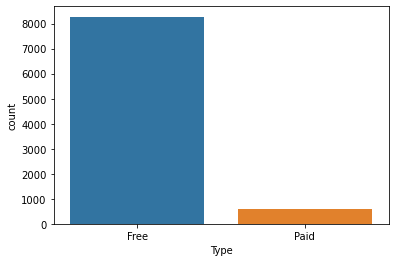

In [417]:
sns.countplot(x=df["Type"])   #free apps are available more 

<AxesSubplot:xlabel='Type', ylabel='count'>

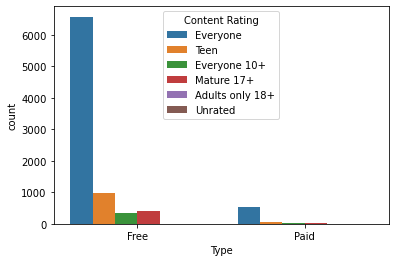

In [419]:
sns.countplot(x=df["Type"],hue=df["Content Rating"])   
# free apps have more ratings as :
#1. more people use them 
#2. free apps are mpre than paid apps


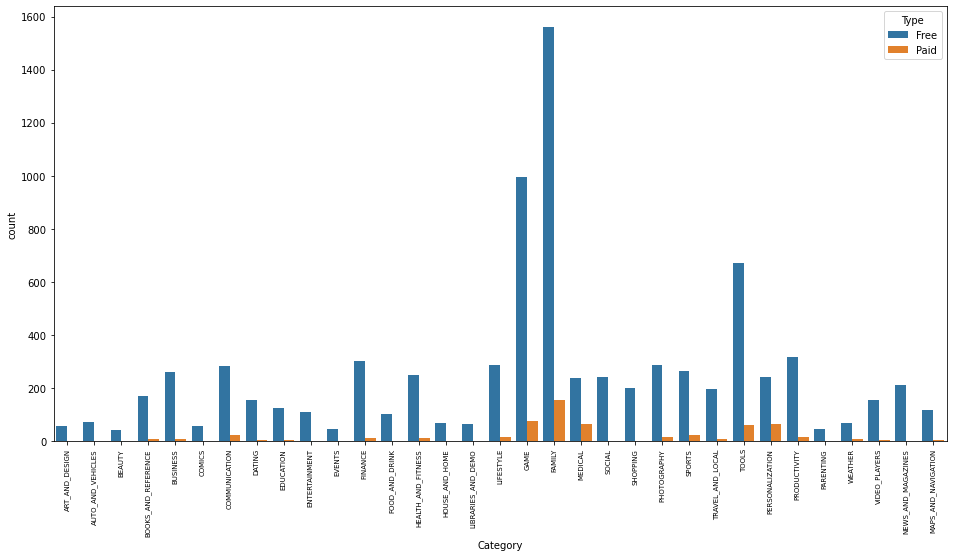

In [416]:
plt.figure(figsize=(16,8))
fig=sns.countplot(x=df["Category"],hue=df["Type"])
fig.set_xticklabels(fig.get_xticklabels(), rotation =90,fontsize=7)
plt.show()

## 7. Find Total Number of App having 5 Star Rating


In [423]:
len(df[df['Rating']==5.0])

271

## 8. Find Total Number of Free and Paid Apps

In [425]:
df['Type'].value_counts()

Free    8275
Paid     611
Name: Type, dtype: int64

## 9. App with maximum Reviews

In [452]:
df[df['Reviews'] == df['Reviews'].max()]['App']

2989    GollerCepte Live Score
Name: App, dtype: object

In [457]:
index = df['Reviews'].sort_values(ascending=False).head().index

In [458]:
df.iloc[index]['App']

3548    Any.do: To-do list, Calendar, Reminders & Planner
5767                          Ultimate Watch 2 watch face
3256                        ZenUI Keyboard – Emoji, Theme
3821                    T map (te map, T map, navigation)
3620                             Daniel Tiger for Parents
Name: App, dtype: object